In [2]:
%pip install scikitplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scikitplot


In [1]:
%matplotlib inline
import dtreeviz
from feature_engine import encoding, imputation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import base, compose, datasets, ensemble, \
metrics, model_selection, pipeline, preprocessing, tree
#import scikitplot
import xgboost as xgb
import yellowbrick.model_selection as ms
from yellowbrick import classifier
import urllib
import zipfile
import xg_help as xhelp
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
'kaggle-survey-2018.zip'
fname = 'kaggle-survey-2018.zip'
member_name = 'multipleChoiceResponses.csv'

In [2]:
raw = xhelp.extract_zip(url, fname, member_name)
## Create raw X and raw y
kag_X, kag_y = xhelp.get_rawX_y(raw, 'Q6')
## Split data
kag_X_train, kag_X_test, kag_y_train, kag_y_test = \
model_selection.train_test_split(
kag_X, kag_y, test_size=.3, random_state=42, stratify=kag_y)
## Transform X with pipeline
X_train = xhelp.kag_pl.fit_transform(kag_X_train)
X_test = xhelp.kag_pl.transform(kag_X_test)
## Transform y with label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(kag_y_train)
y_train = label_encoder.transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)
# Combined Data for cross validation/etc
X = pd.concat([X_train, X_test], axis='index')
y = pd.Series([*y_train, *y_test], index=X.index)

c:\VSC\XGBoost\xg_help.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:76: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:77: FutureWarning: Downcasting behavior in `replace` is 

In [3]:
xg_oob = xgb.XGBClassifier()
xg_oob.fit(X_train, y_train)
xg_oob.score(X_test, y_test)

0.7447513812154696

In [4]:
xg2=xgb.XGBClassifier(max_depth=2,n_estimators=2)
xg2.fit(X_train,y_train)
xg2.score(X_test,y_test)

0.6939226519337016

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


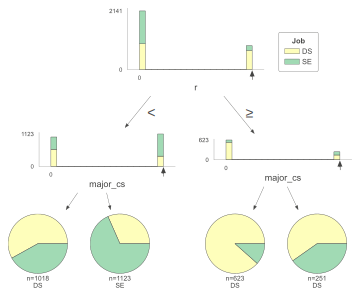

In [5]:
import dtreeviz
viz = dtreeviz.model(xg2, X_train=X, y_train=y, target_name='Job',
feature_names=list(X_train.columns),
class_names=['DS', 'SE'], tree_index=0)
viz.view(depth_range_to_display=[0,2])

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 


<Axes: >

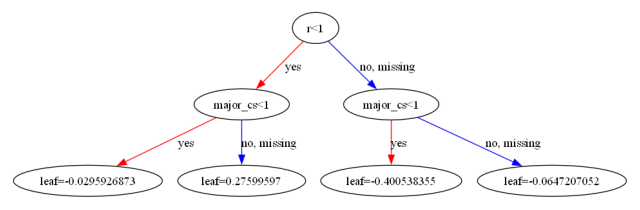

In [6]:
xgb.plot_tree(xg2, num_trees=0)

In [7]:
X.shape

(3015, 18)

In [9]:
X.index

Index([  587,  3065,  8435,  3110, 16372, 11453, 16855, 14760, 17194, 18929,
       ...
       16316,  5191, 13583, 16204, 21654, 11457,  4707, 18587,  3091,  5445],
      dtype='int64', length=3015)

In [10]:
se7894 = pd.DataFrame({'age': {7894: 22},
 'education': {7894: 16.0},
 'years_exp': {7894: 1.0},
 'compensation': {7894: 0},
 'python': {7894: 1},
 'r': {7894: 0},
 'sql': {7894: 0},
 'Q1_Male': {7894: 1},
 'Q1_Female': {7894: 0},
 'Q1_Prefer not to say': {7894: 0},
 'Q1_Prefer to self-describe': {7894: 0},
 'Q3_United States of America': {7894: 0},
 'Q3_India': {7894: 1},
 'Q3_China': {7894: 0},
 'major_cs': {7894: 0},
 'major_other': {7894: 0},
 'major_eng': {7894: 0},
 'major_stat': {7894: 0}})

In [11]:
xg2.predict_proba(se7894)

array([[0.52171636, 0.47828367]], dtype=float32)

In [12]:
xg2.classes_

array([0, 1])

In [13]:
label_encoder.classes_

array(['Data Scientist', 'Software Engineer'], dtype=object)

In [14]:
xg2.predict(pd.DataFrame(se7894))

array([0])

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 


<Axes: >

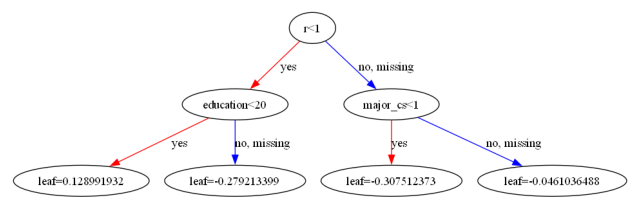

In [15]:
xgb.plot_tree(xg2, num_trees=1)

In [16]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

In [18]:
inv_logit(-0.0295926893)

np.float64(0.49260236752615544)

In [20]:
inv_logit(0.128991932)

np.float64(0.5322033429778975)

In [21]:
inv_logit(-0.0295926893+0.128991932)

np.float64(0.5248293707586409)